## memory test on drugged islander

https://www.kaggle.com/datasets/steveahn/memory-test-on-drugged-islanders-data

Context
An experiment on the effects of anti-anxiety medicine on memory recall when being primed with happy or sad memories. The participants were done on novel Islanders whom mimic real-life humans in response to external factors.

Drugs of interest (known-as) [Dosage 1, 2, 3]:

A - Alprazolam (Xanax, Long-term) [1mg/3mg/5mg]

T - Triazolam (Halcion, Short-term) [0.25mg/0.5mg/0.75mg]

S- Sugar Tablet (Placebo) [1 tab/2tabs/3tabs]

*Dosages follow a 1:1 ratio to ensure validity
*Happy or Sad memories were primed 10 minutes prior to testing
*Participants tested every day for 1 week to mimic addiction

DataSimple
https://www.datasimple.education/

**Inspiration**
+ How does anti-anxiety medicine affect you differently by age?
+ Is there a level of plateauing in effectiveness of anti-anxiety medicine - if so, at what point?
+ Effect of anti-anxiety medicine on memory recall?
+ Effectiveness of placebos in a test environment?

In [ ]:
# from google.colab import drive
# drive.mount('/content/gdrive')

## How to complete a guided project?

To make this fun and provide a full project for students to experiment with 'None' will serve as the blank space we need to fill the missing code. **Every 'None' needs to be filled in with Python Code.**

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/brandynewanek/brandynewanek/main/Islander_data.csv')

In [4]:
df.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


# Check Shape

In [5]:
df.shape

(1188, 10)

**Observations**

+ 1188 rows and 13 columns

# Check Null Values

In [7]:
df.isnull().sum()

,0
Unnamed: 0,0
index,0
first_name,0
last_name,0
age,0
Happy_Sad_group,0
Dosage,0
Drug,0
Mem_Score_Before,0
Mem_Score_After,0


**Observations**

+ There are no null value present

# Create Sample

In [10]:
df_smpl = df.sample(n=50, random_state=42)

# drop those rows from "population"
df_pplt = df.drop(df_smpl.index)

# print rows
print(df_smpl.shape)
print(df_pplt.shape)

(50, 10)
(1138, 10)


<font size=4>"*We can now simulate the effect of sampling and begin to appreciate the effect this has and we examine our data from different angles. Please change n= to different "*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**

# Drop

In [13]:
df_smpl.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
319,319,46,Felipe,Carrasco,51,S,3,A,55.2,74.3
1156,1156,184,Naoki,Durand,51,S,3,T,72.1,74.3
907,907,16,Kaito,McCarthy,51,S,1,A,48.3,44.6
86,86,42,Lara,Summers,56,S,2,A,64.4,48.1
936,936,151,Ava,Summers,31,S,1,T,58.6,52.7


In [14]:
df_pplt.head()

,Unnamed: 0,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
0,0,150,Daichi,Steiner,37,S,1,T,64.2,57.3
1,1,26,Kaito,Carrasco,35,S,2,A,75.0,82.9
2,2,93,Sara,Castro,35,H,2,S,46.0,43.2
3,3,115,Ryouta,Carrasco,49,H,3,S,62.8,54.1
4,4,55,Daichi,Gonzalez,68,H,3,A,41.9,67.4


In [15]:
df_smpl.drop('Unnamed: 0', axis=1, inplace=True)
df_pplt.drop('Unnamed: 0', axis=1, inplace=True)

**Observations**

+ Removed index create while saving csv file.

<font size=4>"*This can also be done on inputing csv file.
 by giving pd.read_csv("PATH",index=0)."*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**

In [16]:
df_smpl.head()

,index,first_name,last_name,age,Happy_Sad_group,Dosage,Drug,Mem_Score_Before,Mem_Score_After
319,46,Felipe,Carrasco,51,S,3,A,55.2,74.3
1156,184,Naoki,Durand,51,S,3,T,72.1,74.3
907,16,Kaito,McCarthy,51,S,1,A,48.3,44.6
86,42,Lara,Summers,56,S,2,A,64.4,48.1
936,151,Ava,Summers,31,S,1,T,58.6,52.7


# EDA

## define palette


**colormind.io** for color palette

In [17]:
palette = ['#FF7F50', '#008080', '#FFD700']

# Feature Engineer Memory_chng

<font size=4>"*If we think about what this dataset is about an interesting questions we could ask ourselves is, what is the effect or change in memory while using each drug"*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**

In [18]:
df_smpl['Diff_Mem_Score'] = df_smpl['Mem_Score_After'] - df_smpl['Mem_Score_Before']
df_pplt['Diff_Mem_Score'] = df_pplt['Mem_Score_After'] - df_pplt['Mem_Score_Before']

<Axes: title={'center': 'Difference in Memory Score Sample'}, ylabel='Frequency'>

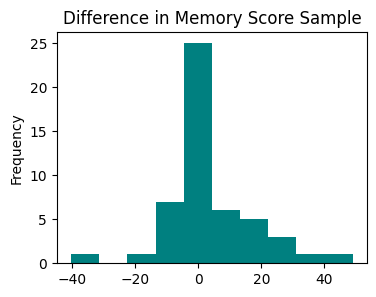

In [20]:
df_smpl['Diff_Mem_Score'].plot(kind='hist', color=palette[1],
                title="Difference in Memory Score Sample",
                figsize=(4,3))

<Axes: title={'center': 'Difference in Memory Score Population'}, ylabel='Frequency'>

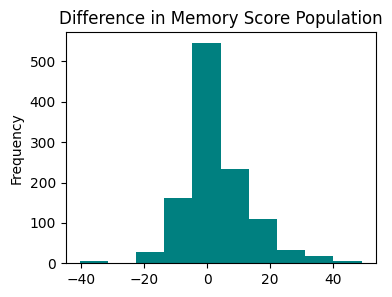

In [21]:
df_pplt['Diff_Mem_Score'].plot(kind='hist', color=palette[1],
                title="Difference in Memory Score Population",
                figsize=(4,3))

**Observation**

+ The change in memory scores resemble a normal distribution.

## Check Data Types

In [22]:
df_pplt.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 0 to 1187
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   index             1138 non-null   int64  
 1   first_name        1138 non-null   object 
 2   last_name         1138 non-null   object 
 3   age               1138 non-null   int64  
 4   Happy_Sad_group   1138 non-null   object 
 5   Dosage            1138 non-null   int64  
 6   Drug              1138 non-null   object 
 7   Mem_Score_Before  1138 non-null   float64
 8   Mem_Score_After   1138 non-null   float64
 9   Diff_Mem_Score    1138 non-null   float64
dtypes: float64(3), int64(3), object(4)
memory usage: 97.8+ KB


**Observations**

+ Data Types:
  + 4 Strings
  + 3 integers
  + 3 floats

## Univariate Analysis - distributions

In [23]:
df_smpl.columns

Index(['index', 'first_name', 'last_name', 'age', 'Happy_Sad_group', 'Dosage',
       'Drug', 'Mem_Score_Before', 'Mem_Score_After', 'Diff_Mem_Score'],
      dtype='object')

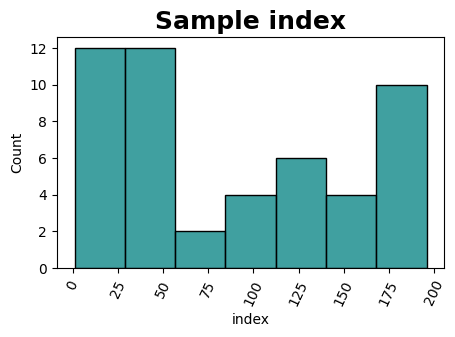

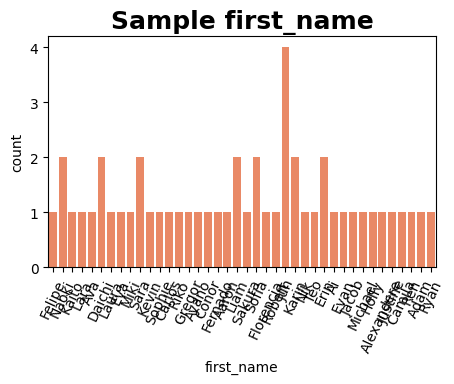

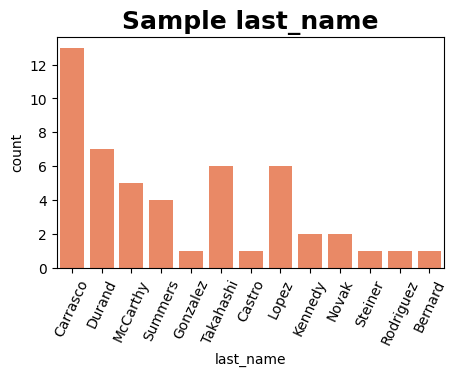

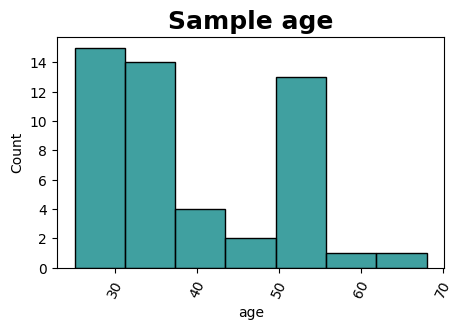

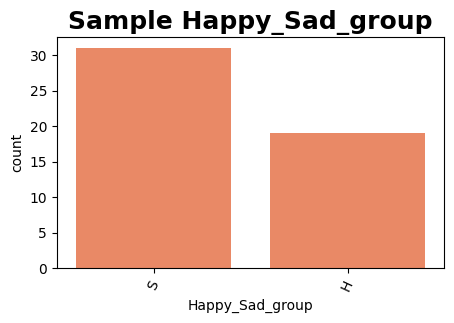

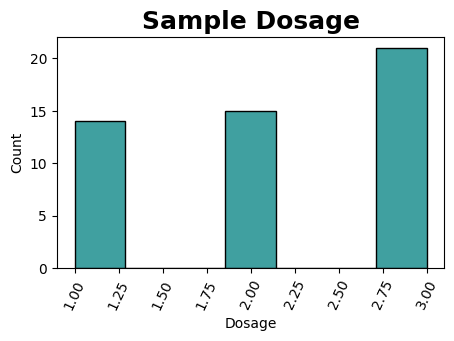

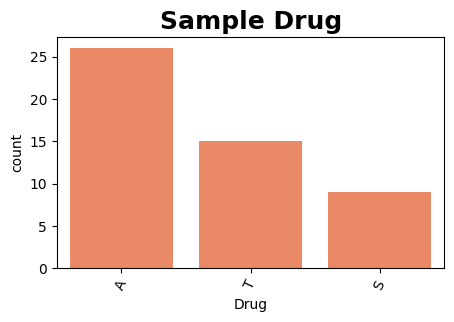

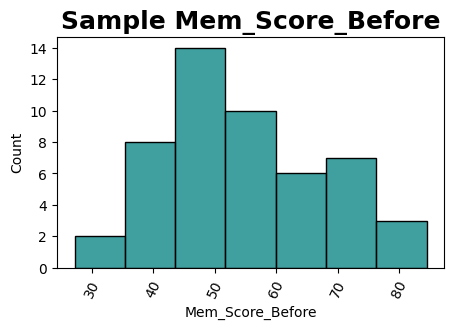

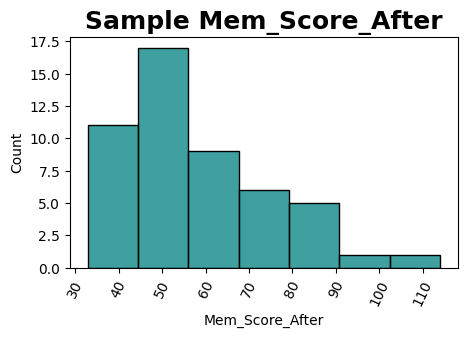

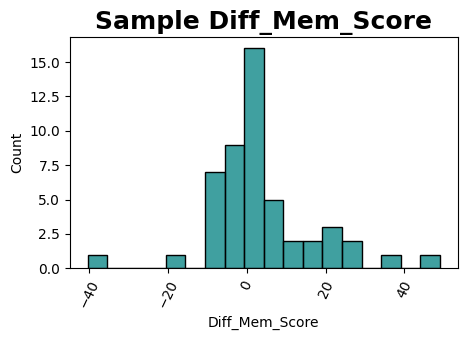

In [25]:
for feat in df_smpl.columns: # feat for feature
  plt.figure(figsize=(5,3)) #width, height

  if df_smpl[feat].dtype == 'object': # if datatype is object
    sns.countplot(data=df_smpl, x=feat, color=palette[0])

  else: # if is anything but object
    sns.histplot(data=df_smpl, x=feat, color=palette[1])

  # formating either type of plot
  plt.title('Sample '+ feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

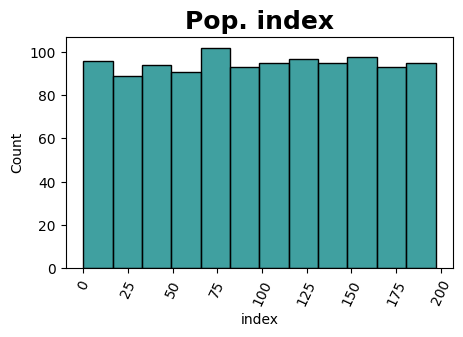

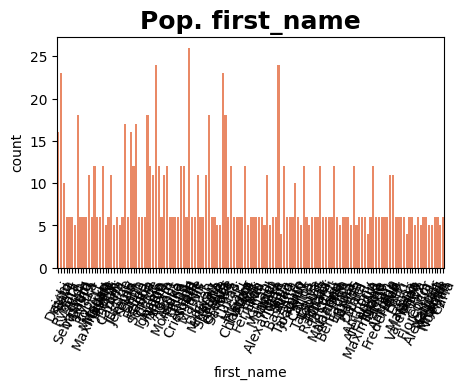

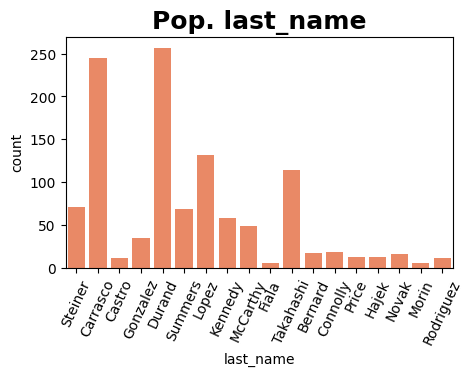

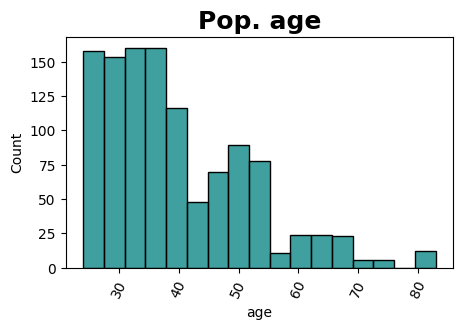

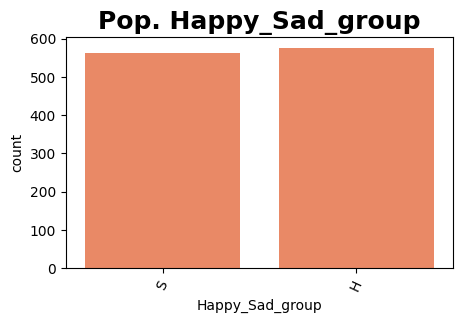

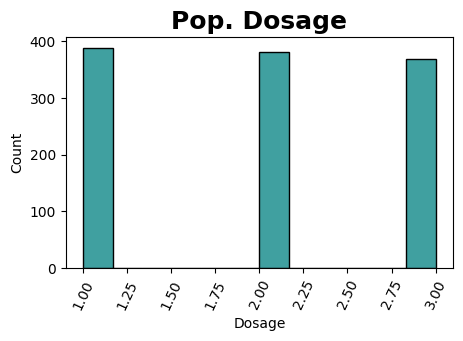

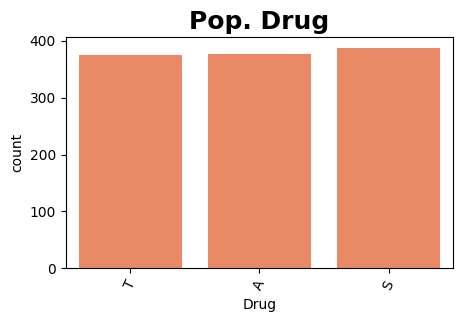

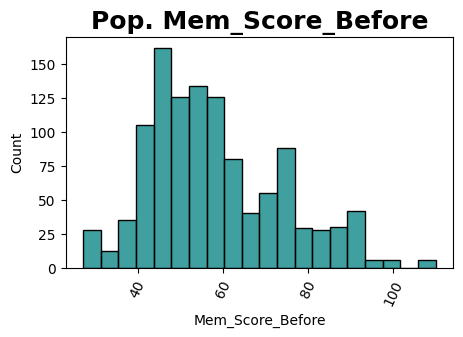

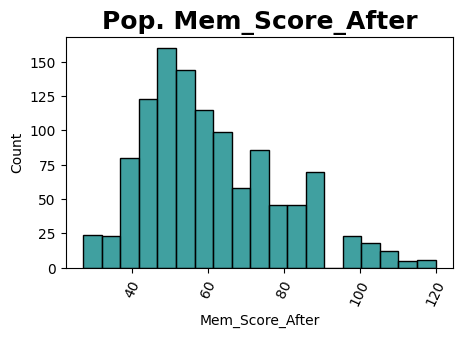

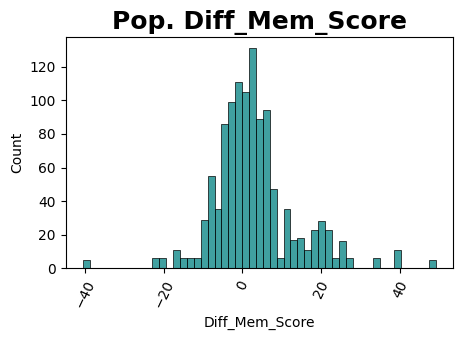

In [26]:
for feat in df_pplt.columns: # feat for feature
  plt.figure(figsize=(5,3)) #width, height

  if df_pplt[feat].dtype == 'object':
    sns.countplot(data=df_pplt, x=feat, color=palette[0])

  else:
    sns.histplot(data=df_pplt, x=feat, color=palette[1])

  # formating either type of plot
  plt.title('Pop. '+ feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ index - uniform distribution
+ last name - Durand and Carrasco appear significantly more often
+ age - weak exponential distribution
+ Happy_Sad_group - balanced classes
+ Dosage - interger only 3 values could be a category feature
+ Drug - equal balanced 3 classes
+ Mem_Score_Before - semi normal with slight right tail
+ Mem_Score_After - semi normal with slight right tail
+ Diff - semi normal with outliers on both sides

<font size=4>"*Notice how different the distributions are depending on the value of n.  The higher values should be closer to the popluation distributions.  50 might seem high but 5% of the population will actually be significantly more than you normally have in a data analysis.  **Always remember we have only a sample and so we can only guess at the true answer hidden in the population** "*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**



## Analysis by Happy_Sad_group

A theory I have is that being happy or sad would have an effect on memory.  Let's examine this here.  

/tmp/ipython-input-29-1976661157.py:2: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_smpl, x='Happy_Sad_group',


Text(0.5, 1.0, 'Happy_Sad_group')

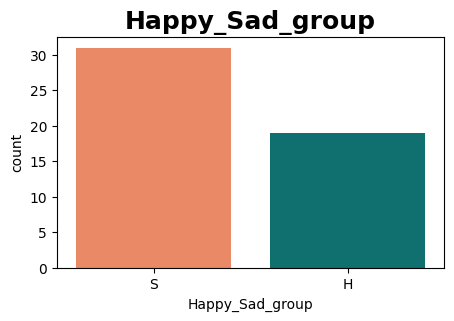

In [29]:
plt.figure(figsize=(5,3))
sns.countplot(data=df_smpl, x='Happy_Sad_group',
             hue='Happy_Sad_group', palette=palette)
plt.title('Happy_Sad_group', fontsize=18, fontweight='bold')

/tmp/ipython-input-31-1240562680.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)


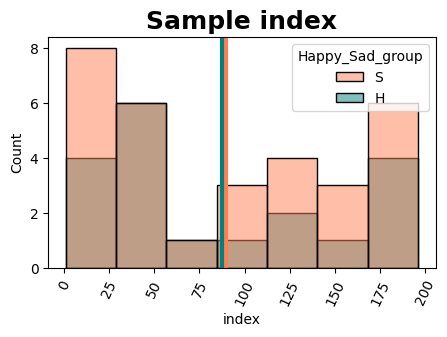

/tmp/ipython-input-31-1240562680.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_smpl, x=feat, palette=palette, hue='Happy_Sad_group')


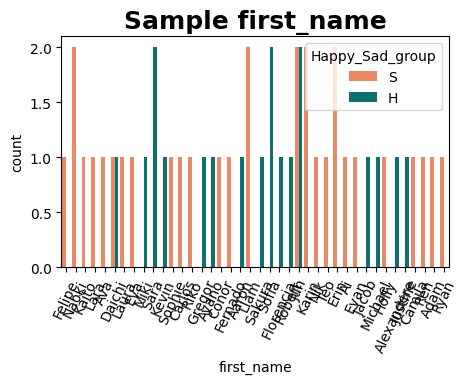

/tmp/ipython-input-31-1240562680.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_smpl, x=feat, palette=palette, hue='Happy_Sad_group')


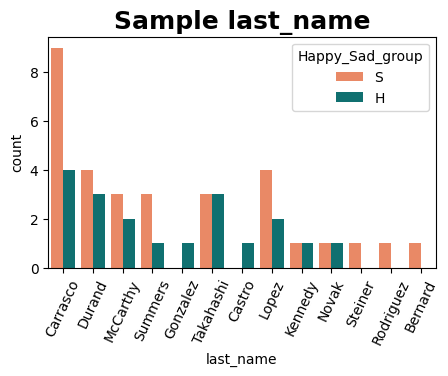

/tmp/ipython-input-31-1240562680.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)


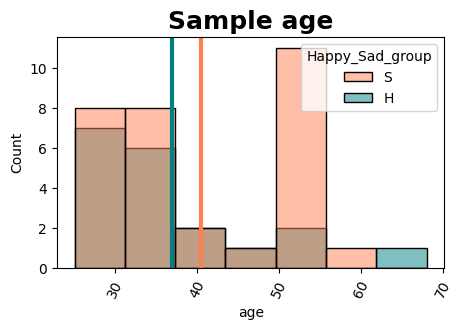

/tmp/ipython-input-31-1240562680.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_smpl, x=feat, palette=palette, hue='Happy_Sad_group')


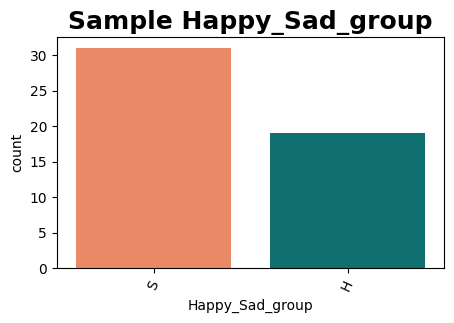

/tmp/ipython-input-31-1240562680.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)


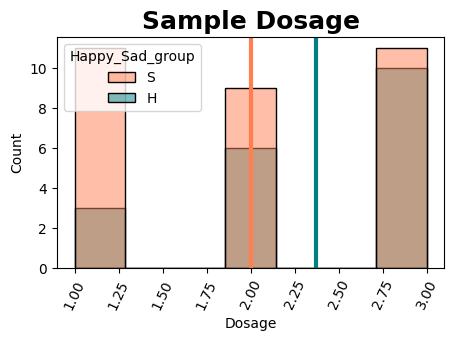

/tmp/ipython-input-31-1240562680.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_smpl, x=feat, palette=palette, hue='Happy_Sad_group')


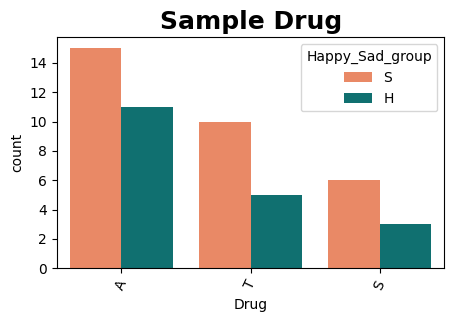

/tmp/ipython-input-31-1240562680.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)


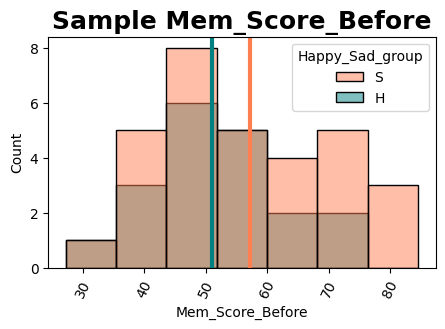

/tmp/ipython-input-31-1240562680.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)


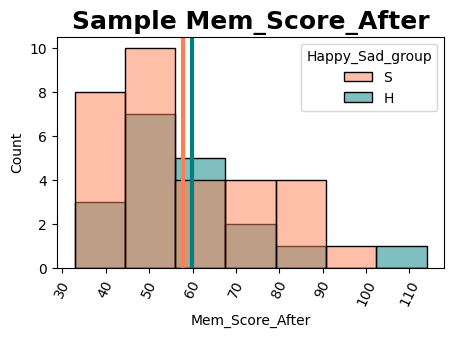

/tmp/ipython-input-31-1240562680.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)


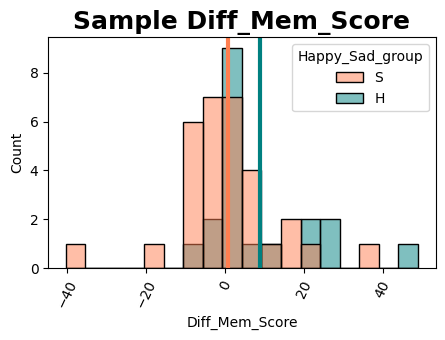

In [31]:
for feat in df_smpl.columns:
  plt.figure(figsize=(5,3))

  if df_smpl[feat].dtype == 'object':
    sns.countplot(data=df_smpl, x=feat, palette=palette, hue='Happy_Sad_group')

  else:
    sns.histplot(data=df_smpl, x=feat,  hue='Happy_Sad_group', palette=palette)
    plt.axvline(df_smpl[df_smpl['Happy_Sad_group']=='S'][feat].mean(),
                color=palette[0], lw=3)
    plt.axvline(df_smpl[df_smpl['Happy_Sad_group']=='H'][feat].mean (),
                color=palette[1], lw=3)

  plt.title('Sample ' + feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

<font size=4>"*This is a good opportunity to use an LLM to help us understand the warning we are seeing.  See if you can answer, Why are we seeing this UserWarning above? Is it important to us (will is affect our code or analysis)? How can we stop this from happening when we need to present our notebook to colleagues? "*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**



/tmp/ipython-input-37-3946989588.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)


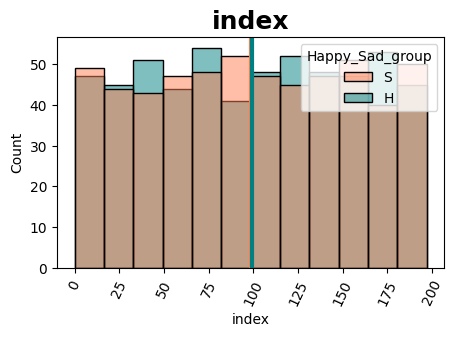

/tmp/ipython-input-37-3946989588.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_pplt, x=feat, palette=palette, hue='Happy_Sad_group')


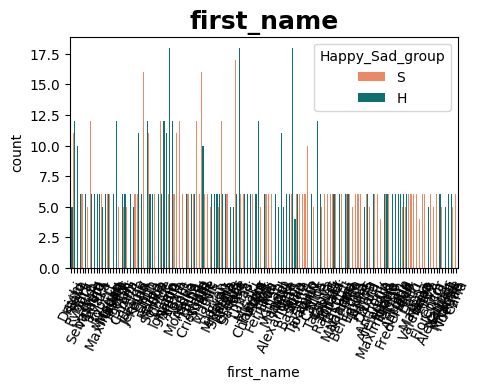

/tmp/ipython-input-37-3946989588.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_pplt, x=feat, palette=palette, hue='Happy_Sad_group')


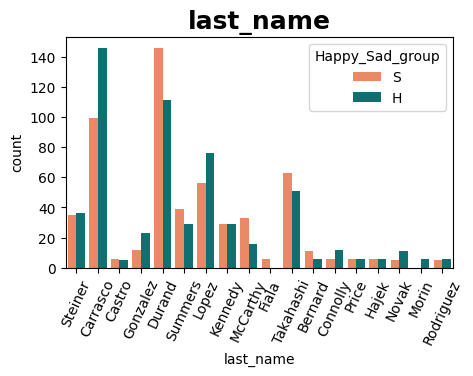

/tmp/ipython-input-37-3946989588.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)


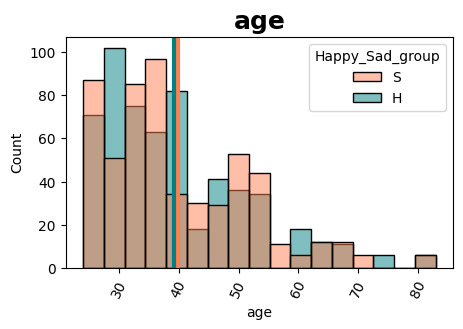

/tmp/ipython-input-37-3946989588.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_pplt, x=feat, palette=palette, hue='Happy_Sad_group')


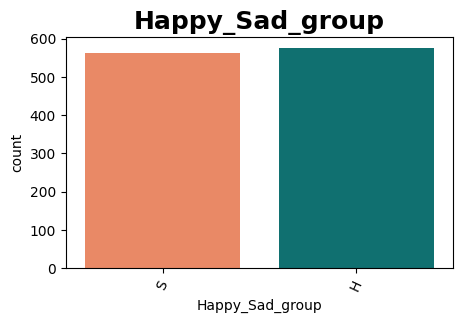

/tmp/ipython-input-37-3946989588.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)


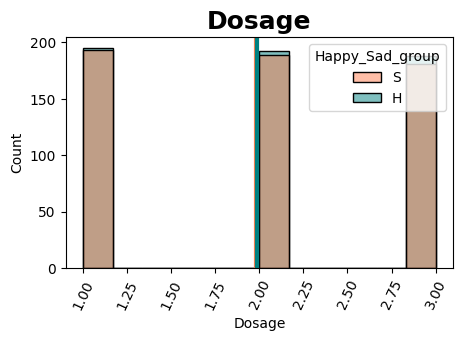

/tmp/ipython-input-37-3946989588.py:5: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.countplot(data=df_pplt, x=feat, palette=palette, hue='Happy_Sad_group')


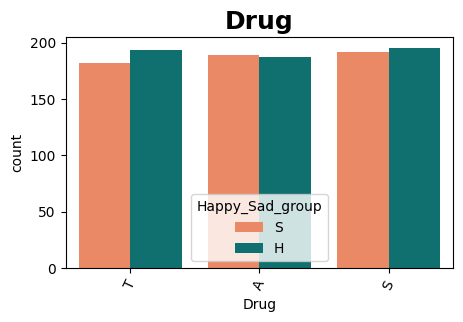

/tmp/ipython-input-37-3946989588.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)


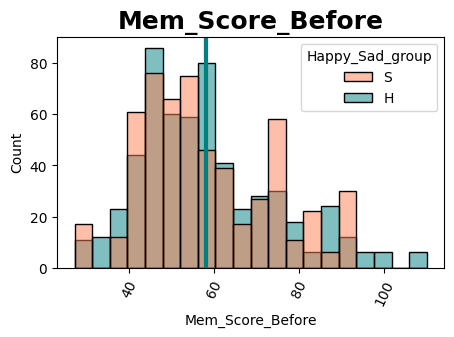

/tmp/ipython-input-37-3946989588.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)


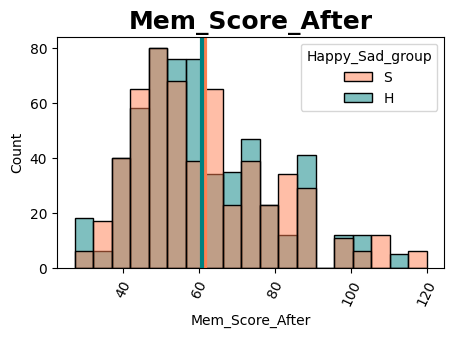

/tmp/ipython-input-37-3946989588.py:8: UserWarning: The palette list has more values (3) than needed (2), which may not be intended.
  sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)


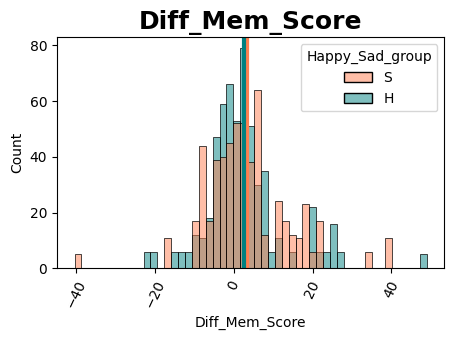

In [37]:
for feat in df_pplt.columns:
  plt.figure(figsize=(5,3))

  if df_pplt[feat].dtype == 'object':
    sns.countplot(data=df_pplt, x=feat, palette=palette, hue='Happy_Sad_group')

  else:
    sns.histplot(data=df_pplt, x=feat,  hue='Happy_Sad_group', palette=palette)
    plt.axvline(df_pplt[df_pplt['Happy_Sad_group']=='S'][feat].mean(),
                color=palette[0], lw=3)
    plt.axvline(df_pplt[df_pplt['Happy_Sad_group']=='H'][feat].mean(),
                color=palette[1], lw=3)

  plt.title(feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ last_name - Carrasco have disposition for Happy and Durand for Sad
 + could be related to family genetics

+ age - no evident effect on Happy_Sad_group
+ Dosage - no effect on Happy_Sad_group
+ Drug - no effect on Happy_Sad_group
+ Mem_Score_Before - no effect on Happy_Sad_group
+ Mem_Score_After - no effect on Happy_Sad_group
+ Diff_Mem_Score - no effect on Happy_Sad_group


<font size=4> **Emotional state in terms of happy or sadness doesn't have a strong relationship with any other feature directly**</font>


<font size=4>"*If we just had access  to a sample we can see how different our results would be.  It seems like Happiness has a positive affect on memory during the drug trail.  But when we look at the population we can see that this hold true.  This highlights how random sampling can have an effect on our analysis and we need to be humbly aware of this during our analyses."*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**


## Analysis by drug

The main question we would want answer on this dataset is, Did drugs affect the capacities of the islanders?

Let's explore this next.

<Axes: title={'center': 'Drug'}, xlabel='Drug'>

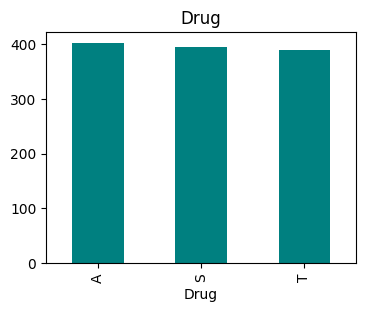

In [40]:
df['Drug'].value_counts().plot(kind='bar', title='Drug',
                               color=palette[1], figsize=(4,3))

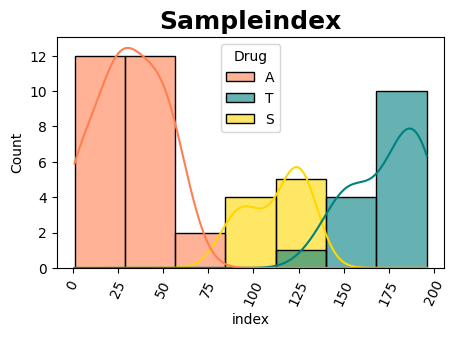

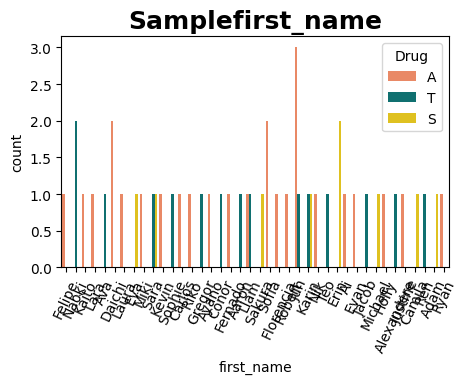

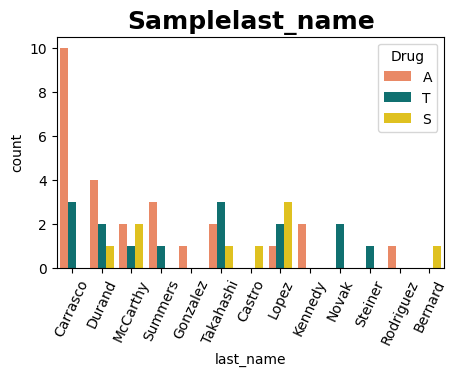

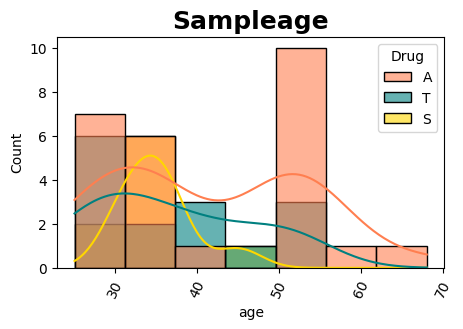

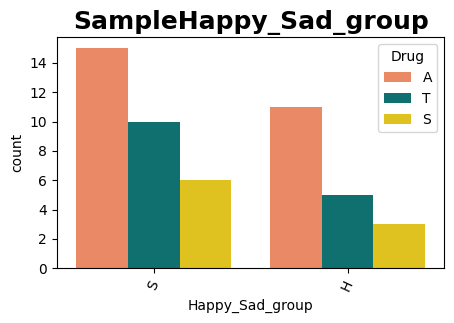

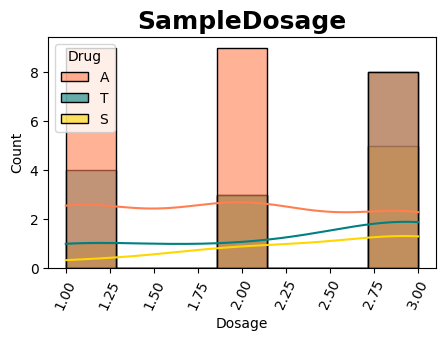

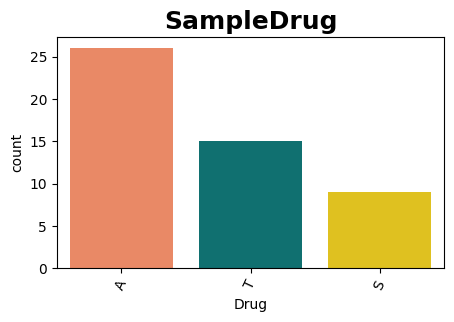

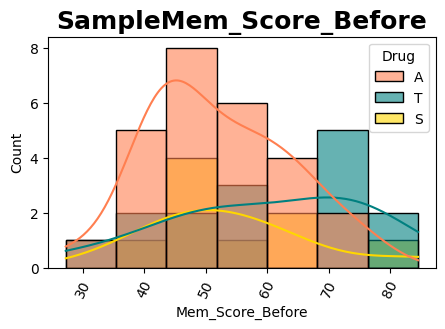

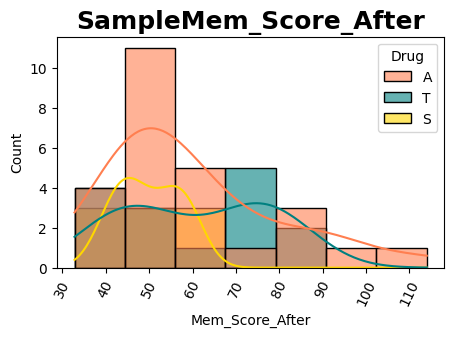

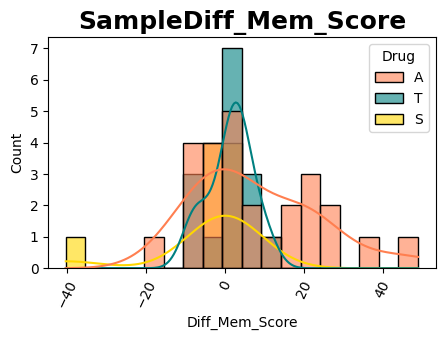

In [41]:
for feat in df_smpl.columns:
  plt.figure(figsize=(5,3))

  if df_smpl[feat].dtype=='object':
    sns.countplot(data=df_smpl, x=feat, palette=palette, hue='Drug')
  else:
    sns.histplot(data=df_smpl, x=feat,  hue='Drug', kde=True, alpha=.6, palette=palette,
                 hue_order=['A', 'T', 'S'])

  plt.title('Sample' + feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

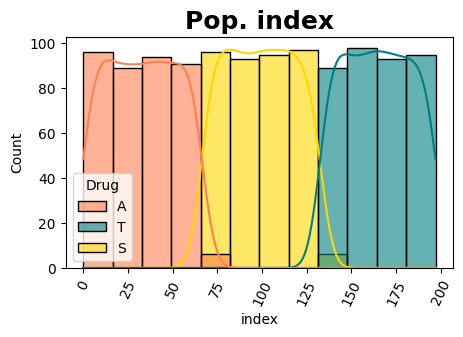

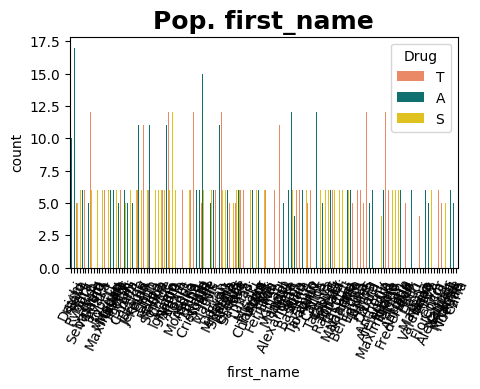

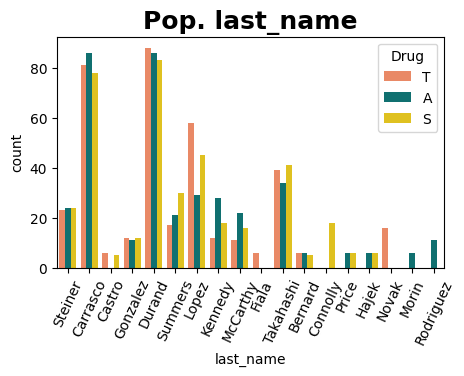

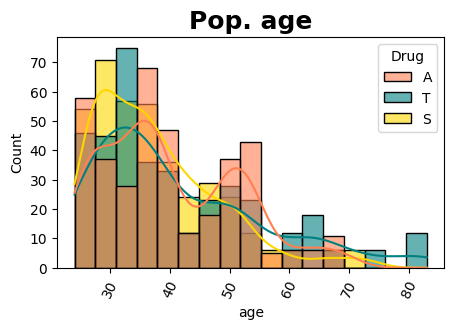

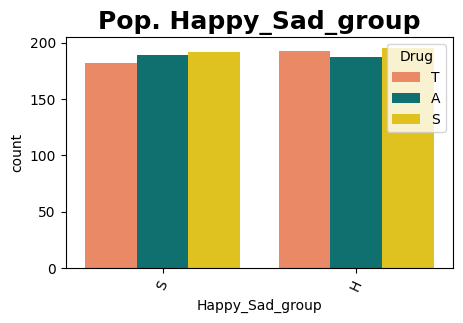

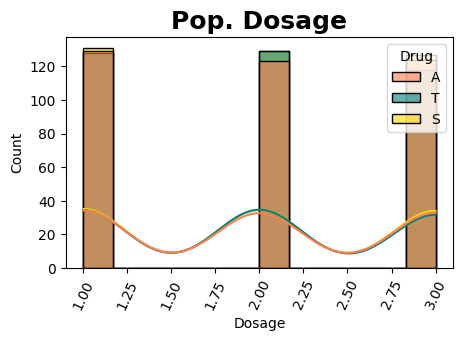

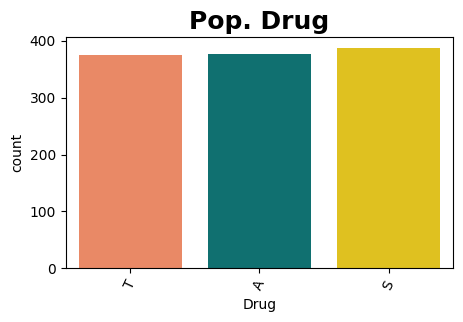

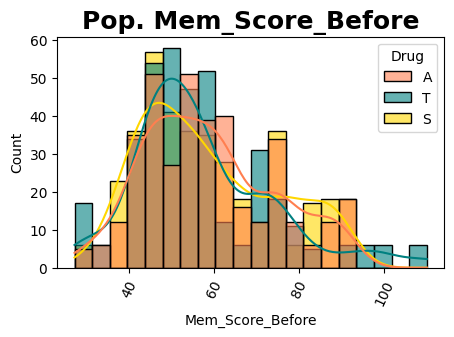

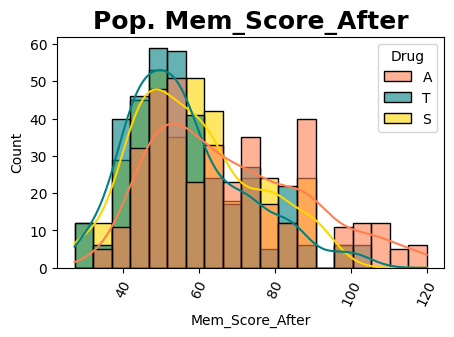

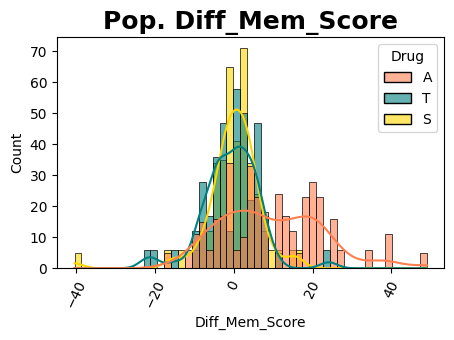

In [42]:
for feat in df_pplt.columns:
  plt.figure(figsize=(5,3))
  if df_pplt[feat].dtype == 'object':
    sns.countplot(data=df_pplt, x=feat, palette=palette, hue='Drug')
  else:
    sns.histplot(data=df_pplt, x=feat,  hue='Drug', kde=True, alpha=.6, palette=palette,
                 hue_order=['A', 'T', 'S'])

  plt.title('Pop. '+feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ drugs were evenly give across Happy_Sad_group classes
+ The dosages were equal between different drugs.
+ about 375 observations for each drug
+ A - Alprazolam (Xanax, Long-term) shows relationship with higher memory score after use.
 + **T - Triazolam (Halcion, Short-term), seems to have no effect**
   + **similar to S- Sugar Tablet**


<font size=4>"*We can see that we would have noticed the results of drug A improving memory.  But in a sample how could we be sure what we are seeing isn't just randomness from sampling.  We will discuss later how to use Hacker Statistics to understand this."*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**


## Analysis by age_cat

Age would likely affect our bodies resistence to drugs but that relationship can often not be linear.  

Binning A continuous feature allows us to examine this.

<Axes: ylabel='Frequency'>

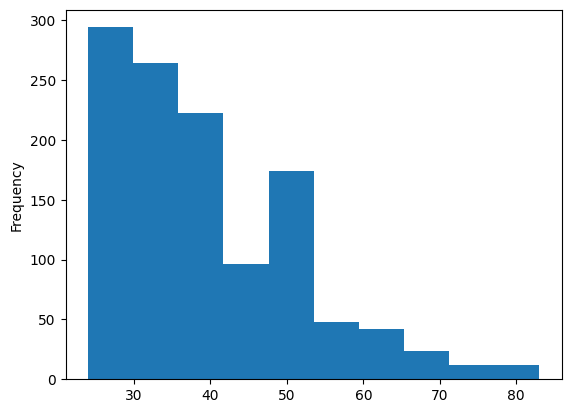

In [43]:
df['age'].plot(kind='hist')

In [45]:
def age_to_cat(x):
  if x > 55:
    value = 'senior'
  elif x < 35:
    value = 'young'
  else:
    value = 'adult'
  return value

In [46]:
df_smpl['age_cat'] = df_smpl['age'].apply(age_to_cat)
df_pplt['age_cat'] = df_pplt['age'].apply(age_to_cat)
df_smpl['age_cat']

,age_cat
319,adult
1156,adult
907,adult
86,senior
936,young
458,senior
1050,young
678,young
323,adult
361,young


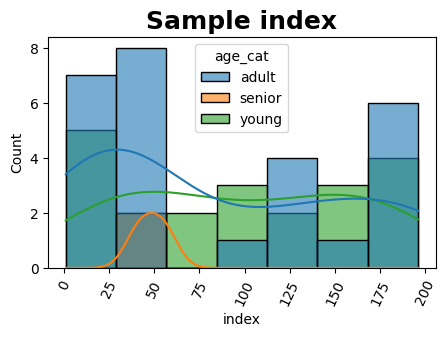

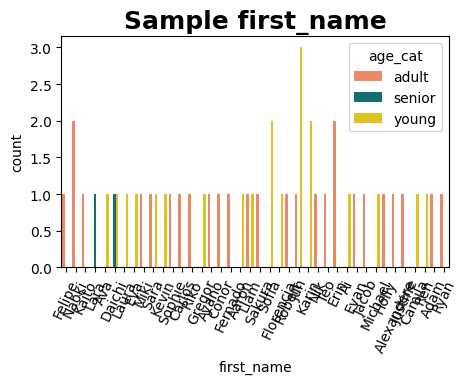

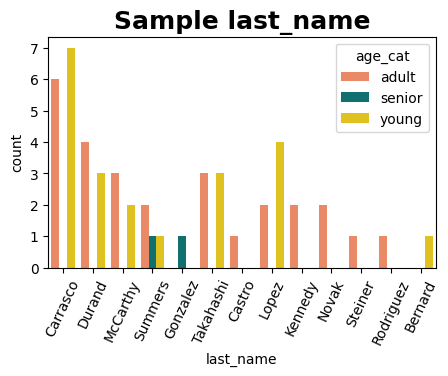

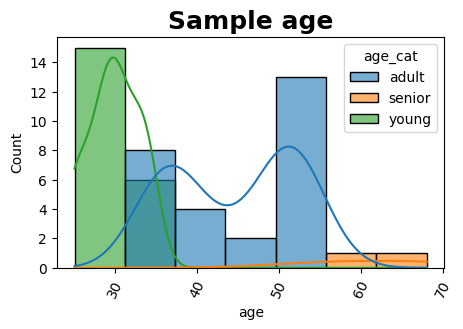

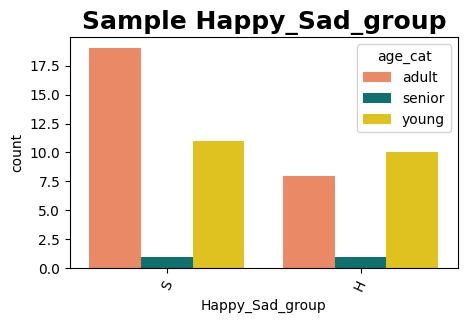

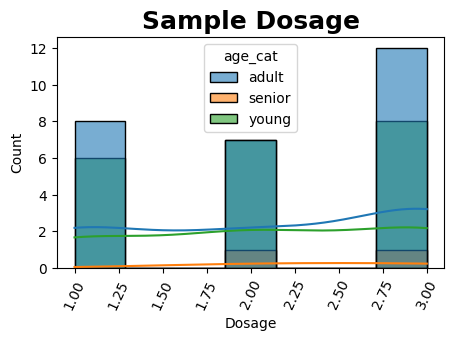

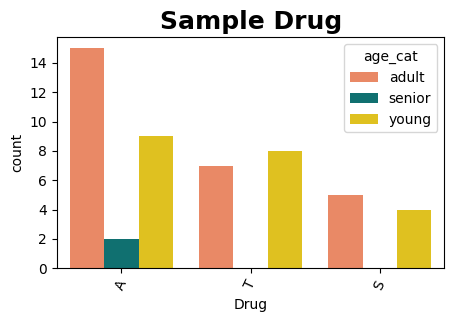

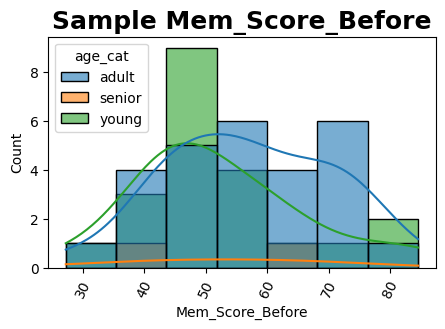

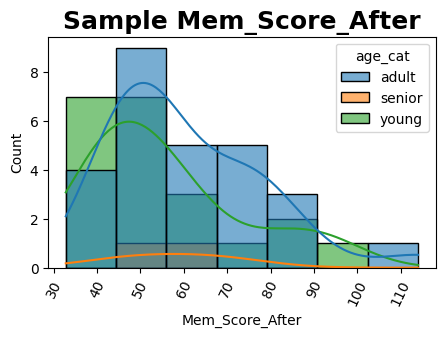

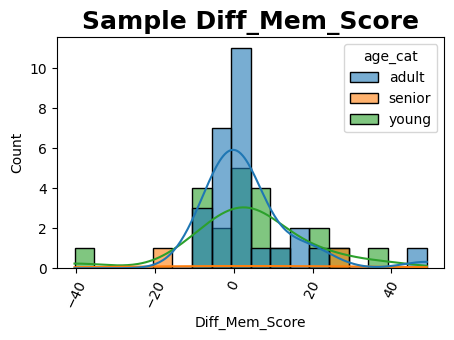

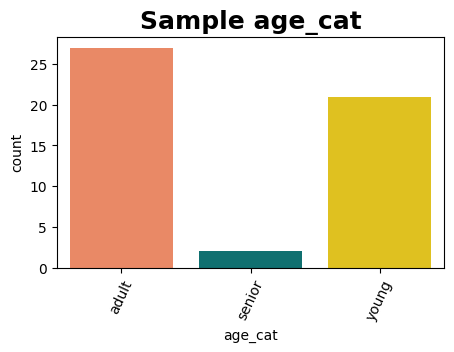

In [47]:
for feat in df_smpl.columns:
  plt.figure(figsize=(5,3))
  if df_smpl[feat].dtype == 'object':
    sns.countplot(data=df_smpl, x=feat, palette=palette, hue='age_cat')
  else:
    sns.histplot(data=df_smpl, x=feat,  hue='age_cat', kde=True, alpha=.6)
  plt.title('Sample ' + feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

**Observations**

+ same distribution of age groups across Happy Sad group
+ slightly more A drug was given to adults
+ smaller portion of adults were highly impacted by the drug, for adults the impact was positive.
  + for younger and older islanders the outlier effects where less clearly either positive or negative.

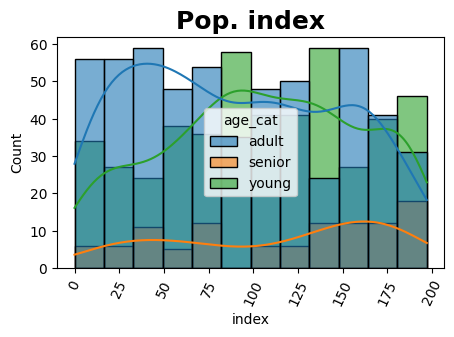

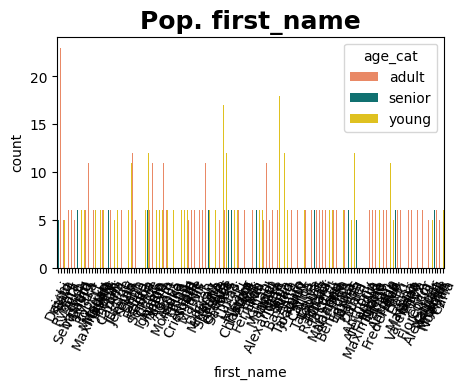

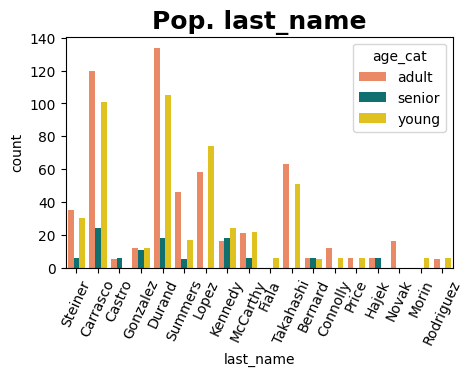

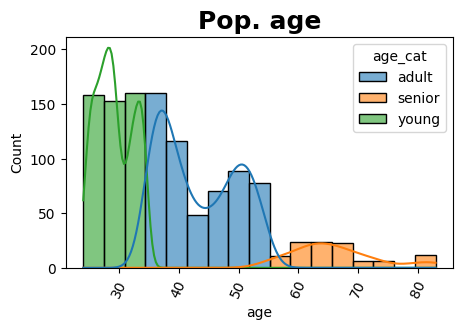

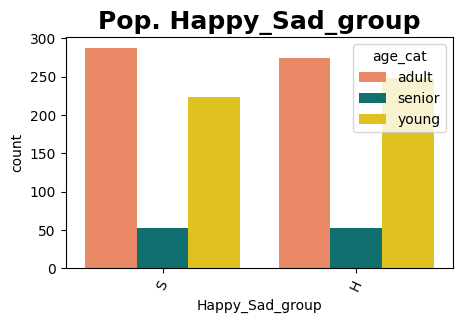

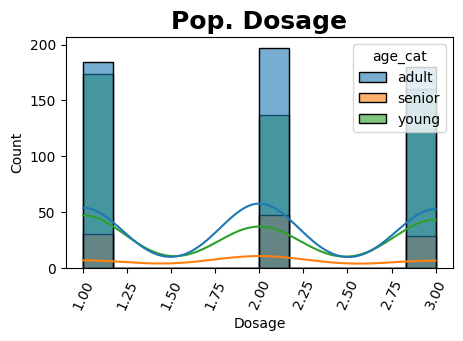

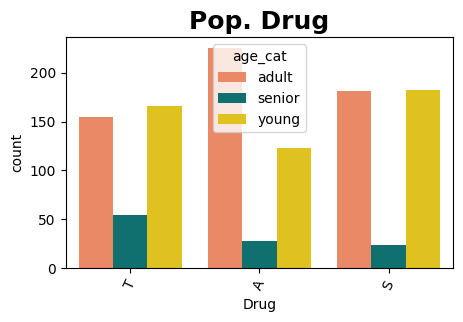

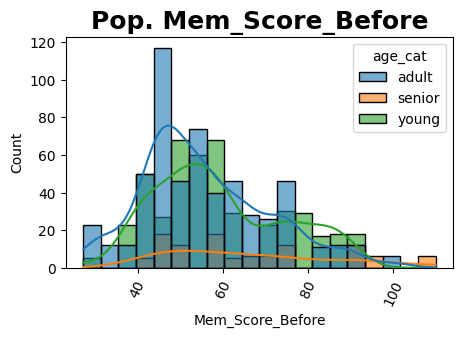

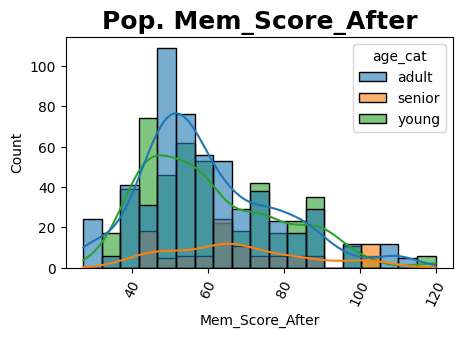

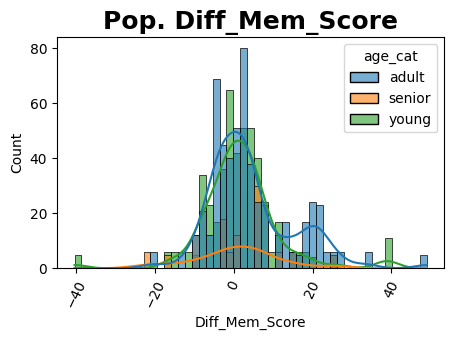

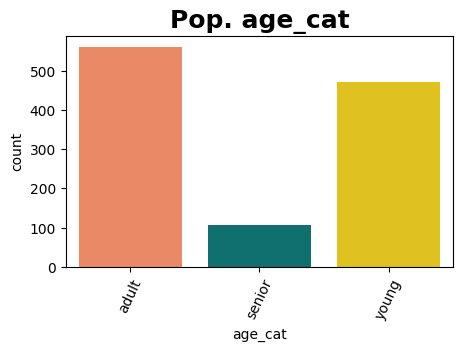

In [49]:
for feat in df_pplt.columns:
  plt.figure(figsize=(5,3))
  if df_pplt[feat].dtype == 'object':
    sns.countplot(data=df_pplt,x=feat, palette=palette, hue='age_cat')
  else:
    sns.histplot(data=df_pplt, x=feat,  hue='age_cat', kde=True, alpha=.6)

  plt.title('Pop. '+feat, fontsize=18, fontweight='bold')
  plt.xticks(rotation=65)
  plt.show()

<font size=4>"*Looking at the sample we only see a hint at the impact potential of positive impacts of the drugs on memory "*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**


## Summary

> From our sample dataset we weren't able to find any interesting because it was hard to tell what was random noise and what was a potential insight.

> In the Population we were able to find that is a good proportion of cases Taking drug 'A' (Xanax) cause adults to receive a memory boost.



<font size=4>"*What's interesting here is that having a small sample made it extremely difficult to tell what could potentially be a pattern and worth looking deeper into.  This is will be something we should also keep in mind while completing an analysis on a sample. "*</font>

-<font color=#2C78B8 size=4> **Data Science Teacher Brandyn**
